<a href="https://colab.research.google.com/github/aanchaljain1993/Project-6/blob/main/Project_6_Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Unsupervised ML - Netflix Movies and TV Shows Clustering





##### **Project Type**    - Unsupervised ML

##### **Contribution**    - Individual

# **Project Summary -**

Netflix is an American subscription video on-demand over-the-top streaming service. The service primarily distributes original and acquired films and television shows from various genres, and it is available internationally in multiple languages.

Get ready to unlock hidden potential! This project meticulously addresses data quality issues, transforming raw information into a powerful resource.

This project harnesses machine learning to group Netflix's vast library of 7,000+ movies and shows by content, helping users discover hidden gems and navigate the platform effortlessly.

To gain insights into the diverse content offered by Netflix, we are going to analyze the dataset containing details about movies and TV shows. We will employee descriptive statistics to understand the distribution of key variables and create visualizations like scatterplots, histograms, line charts, heatmaps etc to explore relationships between them.

This multi-faceted approach will help us uncover valuable patterns and trends within the dataset. Moreover we will identify the key anamolies and try to work upon it.

A concluding statement will not only summarize our findings but also empower audiences to derive value and fuel their own projects with these actionable insights.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this undertaking is to examine the collection of movies and TV shows on Netflix, sourced from the third-party search engine Flixable, and categorize them into meaningful clusters. This effort aims to improve user satisfaction and reduce subscriber attrition for Netflix, the leading online streaming service provider globally, with a subscriber base exceeding 220 million as of the second quarter of 2022. By delving into the dataset, encompassing content available up to 2019, we intend to reveal fresh perspectives and patterns in the swiftly expanding domain of streaming entertainment.

The dataset encompasses TV shows and movies accessible on Netflix up until 2019, sourced from the third-party Netflix search engine, Flixable. In 2018, an intriguing report from Flixable highlighted a remarkable trend: the count of TV shows on Netflix had nearly tripled since 2010. During the same period, the collection of movies had diminished by over 2,000 titles, while TV show availability had experienced a nearly threefold increase. Exploring this dataset promises to reveal a wealth of additional insights awaiting discovery.

Furthermore, the potential for enriching this dataset by integrating it with external data sources like IMDB ratings

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [103]:
# Load Dataset
df= pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
# Retrieve the first few rows of the DataFrame to inspect its structure and contents
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# retrieve last 5 rows of dataset

df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"The number of rows are {df.shape[0]} and number of columns are {df.shape[1]}")


The number of rows are 7787 and number of columns are 12


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
#  Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Check if there are any duplicate rows
if duplicate_rows.shape[0] > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


#### Missing Values/Null Values

In [51]:
# Missing Values/Null Values Count#
missing_values = df.isnull().sum()

# Check if there are any missing values
if missing_values.sum() > 0:
    print("Missing values found:")
    print(missing_values)
else:
    print("No missing values found.")

Missing values found:
show_id          0
type             0
title            0
director         0
cast             0
country          0
release_year     0
rating           7
duration         0
listed_in        0
description      0
month_added     10
year_added      10
dtype: int64


<Axes: >

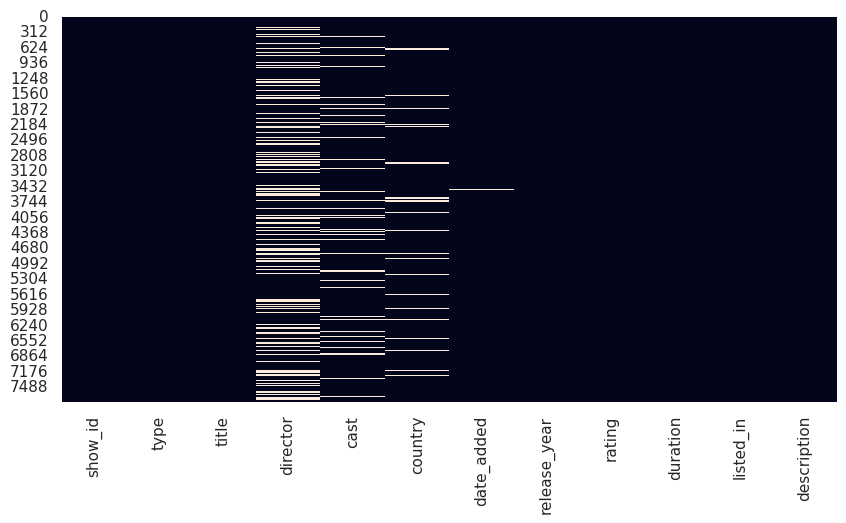

In [10]:
# Visualizing the missing values

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)

### What did you know about your dataset?

The data set contains  7787  rows and number of columns are 12
There are no duplicate values.
There are missing values with director having highest number of missing values 2389 then cast with 718 missing values, country  with 507 and least of date_added  with only 10 missing values

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

how_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***


### Data Wrangling Code

In [104]:
# fill 'director', 'cast' and country column with Unknown
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')


#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [105]:

#again checking is there any null values are not
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [106]:
#Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [107]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x : int(x.split()[0]))


In [108]:
# Check if 'date_added' column exists
if 'date_added' in df.columns:
    # Remove leading and trailing whitespace
    df['date_added'] = df['date_added'].str.strip()
    # Convert to datetime
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df["day_added"]= df["date_added"].dt.day

    # Adding new attributes month and year of date added

    df['month_added'] = df['date_added'].dt.month
    # Extracting Month from date_added Column
    df['month_added'] = pd.DatetimeIndex(df['date_added']).month


    df['year_added'] = df['date_added'].dt.year

    # Check if 'date_added' column exists before dropping it
    if 'date_added' in df.columns:
        df.drop('date_added', axis=1, inplace=True)
else:
    print("'date_added' column not found.")


In [109]:
# Partitioning and creating new dataset based on type of show
tv_shows_data = df[df["type"]=='TV Show']
movie_shows_data = df[df["type"]=='Movie']

In [110]:
tv_shows_data

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,14,8,2020
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1,International TV Shows,A genetics professor experiments with a treatm...,1,7,2017
11,s12,TV Show,1983,Unknown,"Robert Więckiewicz, Maciej Musiał, Michalina O...",Poland,2018,TV-MA,1,Crime TV Shows,"In this dark alt-history thriller, a naïve law...",30,11,2018
12,s13,TV Show,1994,Diego Enrique Osorno,Unknown,Mexico,2019,TV-MA,1,Crime TV Shows,Archival video and new interviews examine Mexi...,17,5,2019
16,s17,TV Show,Feb-09,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown,2018,TV-14,1,International TV Shows,"As a psychology professor faces Alzheimer's, h...",20,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2012,TV-PG,1,International TV Shows,"Strong-willed, middle-class Kashaf and carefre...",15,12,2016
7775,s7776,TV Show,Zoids Wild,Unknown,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2018,TV-Y7,1,Anime Series,A quest for freedom and legendary treasure beg...,14,8,2020
7777,s7778,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2018,TV-Y7,2,Kids' TV,"While living alone in a spooky town, a young g...",1,7,2019
7779,s7780,TV Show,Zona Rosa,Unknown,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019,TV-MA,1,International TV Shows,An assortment of talent takes the stage for a ...,26,11,2019


### What all manipulations have you done and insights you found?

--> There are no duplicate values .

--> There are missing values for that date_added and rating column are removed because they have insignficant amount of null values.

--> For 'director','cast','country' it is handled by filling the null values with 'Unknown'

--> We have chose the primary country and primary genre to simplify the analysis.

---> Duration is in string form , it should be integer so typecasting Typecasting is done and converted to  integer.

---> In 'date_added' column , firstly the whitespaces is removed after that typecasting is done to convert in date time type.

---> Two new column is added month_added and year_added





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

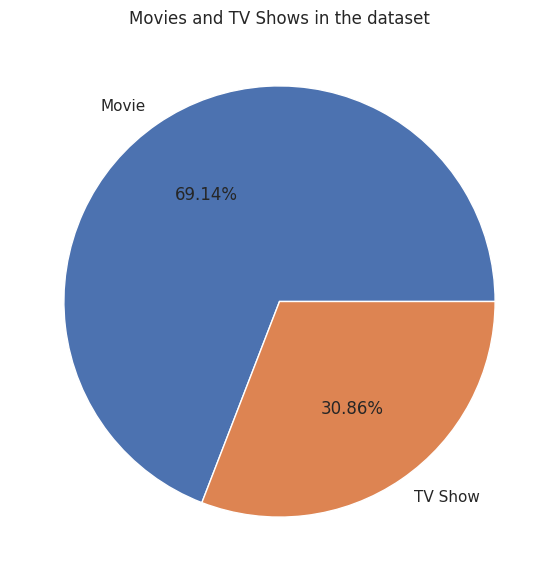

In [21]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')
plt.show()

##### 1. Why did you pick the specific chart?

I have used pie chart beacause Pie charts are an effective visualization technique when the categories present inside a feature are limited in number. They allow us to represent the percentage distribution of each category in a clear and concise manner.



##### 2. What is/are the insight(s) found from the chart?

There are more movies (69.14%) than TV shows (30.86%) in the dataset.

This indicates that the number of movies on Netflix is higher than the number of TV shows, highlighting a greater quantity of movies compared to TV show content on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to develop personalized recommendations for users based on their viewing habits and preferences. If a user tends to watch mostly movies, the recommendation algorithm can suggest similar movies to watch, which can increase user engagement and satisfaction.

#### Chart - 2

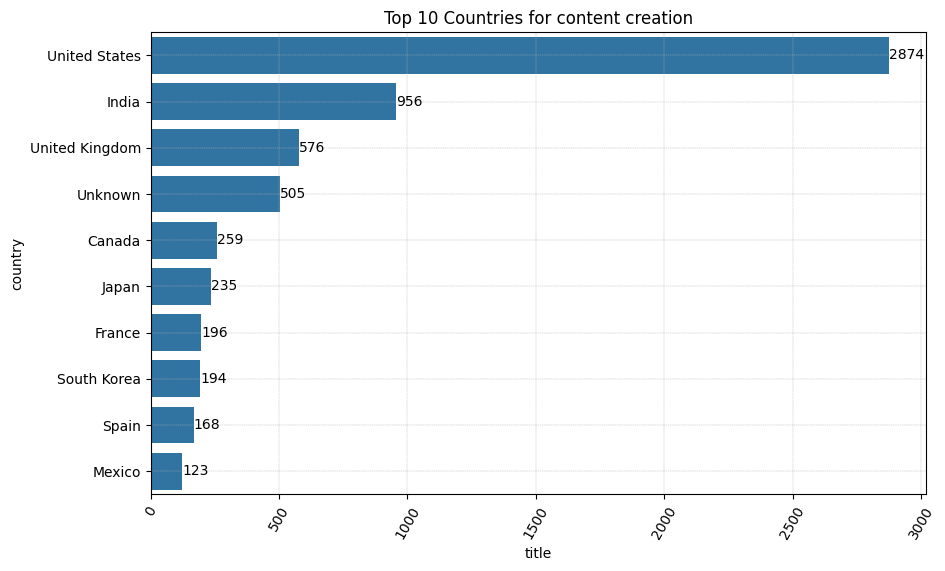

In [30]:
df_country = df.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(10,6))
plots= sns.barplot(y = "country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.grid(linestyle='--', linewidth=0.3)
plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

To know which country produces Maximum number of TV Shows and Movies.



##### 2. What is/are the insight(s) found from the chart?

The United States is the top country producing both movies and TV shows on Netflix. This suggests that Netflix is heavily influenced by American content.

India is the second-highest producer of movies on Netflix, indicating the growing popularity of Bollywood movies worldwide.

Country like canada, france, japan also have significant presence in the data set showing diversity of content on the netflix.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights gained can have a positive impact on Netflix's business by highlighting opportunities for growth and expansion, such as investing in American and Bollywood content, and acquiring more diverse content.

#### Chart - 3

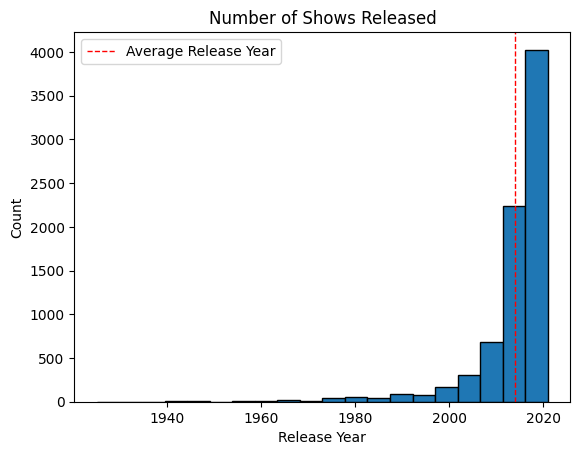

In [32]:
# Chart - 3 visualization code

avg_year = df["release_year"].mean()

plt.hist(df["release_year"], bins=20, edgecolor="black")

plt.axvline(x=avg_year, color="red", linestyle="dashed", linewidth=1, label="Average Release Year")

plt.title("Number of Shows Released")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

- Selecting the above chart conveys a visual of how shows have been released in an interval of time on an average.

##### 2. What is/are the insight(s) found from the chart?

- Following information can be driven out:
1. Release of shows has seen an **incremental** growth with time.
2. **Average** no.of shows releases are in the year **2013**.
3. **Maximum** no.of shows releases are in the year **2021**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The above insight will to some extend help in gaining positive business impact as we can proclaim with every increasing year the no.of shows release is increasing.
- As of we can't see any negative growth from the data above as all the figure that we have seems to be upto the mark, adding some positivity to the data.

#### Chart - 4

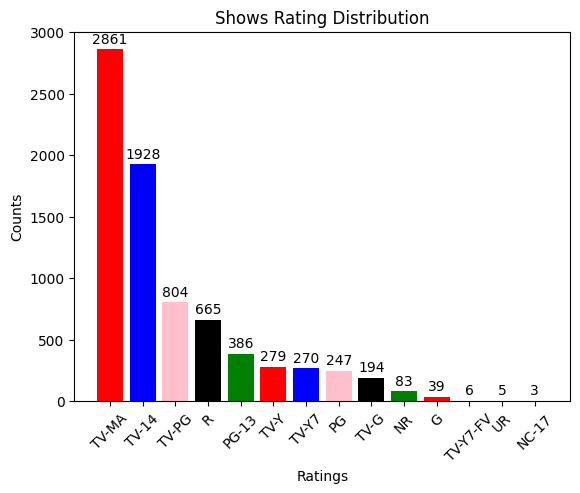

In [31]:
# Chart - 4 visualization code

ratings = df["rating"].value_counts()

colors = ["red", "blue", "pink", "black", "green"]
plt.bar(ratings.index, ratings.values, color=colors)

# Add count labels above each bar
for i, v in enumerate(ratings.values):
    plt.text(i, v + 50, str(v), ha="center")

# Customize the chart
plt.title("Shows Rating Distribution")
plt.xlabel("Ratings")
plt.xticks(rotation=45)
plt.ylabel("Counts")
plt.show()


##### 1. Why did you pick the specific chart?

- The logic of driving bar chart is to conceive the insight of ratings count being majorly provided.

##### 2. What is/are the insight(s) found from the chart?

- The above graph states that:
1. **TV-MA** is the **highest** rating in the list with count of **2861**.
2. **NC-17** is almost the **least** rating in the list with count of **3**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- In short we can for sure say that the above analysis will lay a positive impact on business, as they will get a clear picture of ratings count.
- One negative point is that lesser the rating lesser is the popularity of the show.

#### Chart - 5

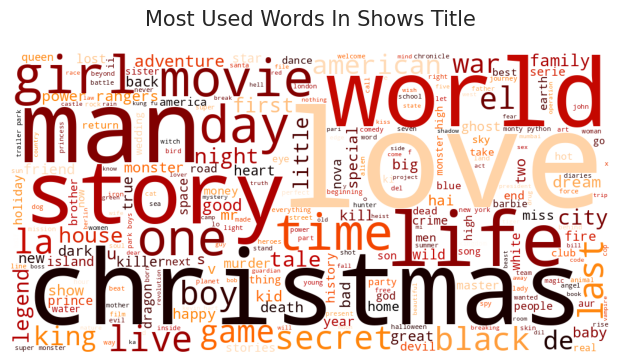

In [91]:

# Chart - 7 WordCloud Plot Visualization Code for Most Used Words in Netflix Shows Title
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df.title:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Shows Title', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


##### 1. Why did you pick the specific chart?

The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.



##### 2. What is/are the insight(s) found from the chart?

From above word cloud plot, it is observed that most repeated words in title include Christmas, Love, World, Man, and Story.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Most repeated words in title include Christmas, Love, World, Man, and Story.
We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles

#### Chart - 6

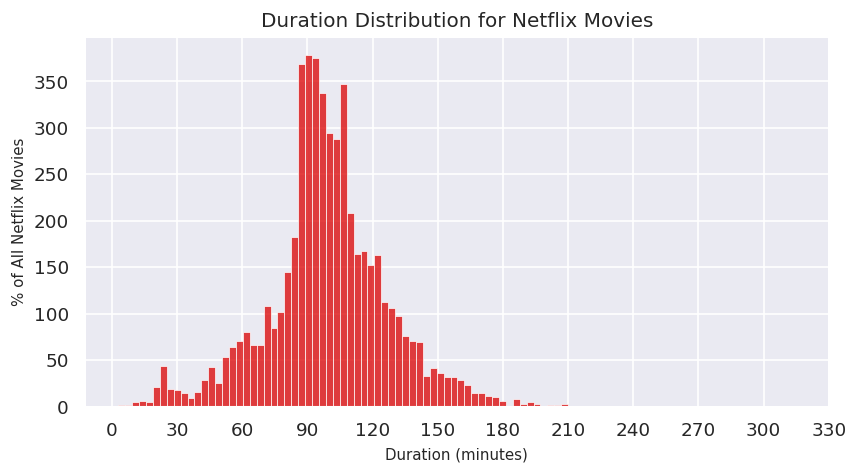

In [85]:
# Convert 'duration' column to string type if needed
movie_shows_data['duration'] = movie_shows_data['duration'].astype(str)

# Replace ' min' with empty string and convert to integer
movie_shows_data['duration'] = movie_shows_data['duration'].str.replace(' min', '')
movie_shows_data['duration'] = pd.to_numeric(movie_shows_data['duration'], errors='coerce')

plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(movie_shows_data.duration, color='#db0000')
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Netflix Movies")
plt.ylabel("% of All Netflix Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()



##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the duration distributions for the netflix movies.


##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that most of the movies last for 90 to 120 minutes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


From the above insight we got to know:

On netflix most of the movies last for 90 to 120 minutes.
So for target audience, movies duration will be greater than minimum 90 minutes.

#### Chart - 7

Text(0.5, 1.0, 'Movies vs TV_shows Release Year Analysis')

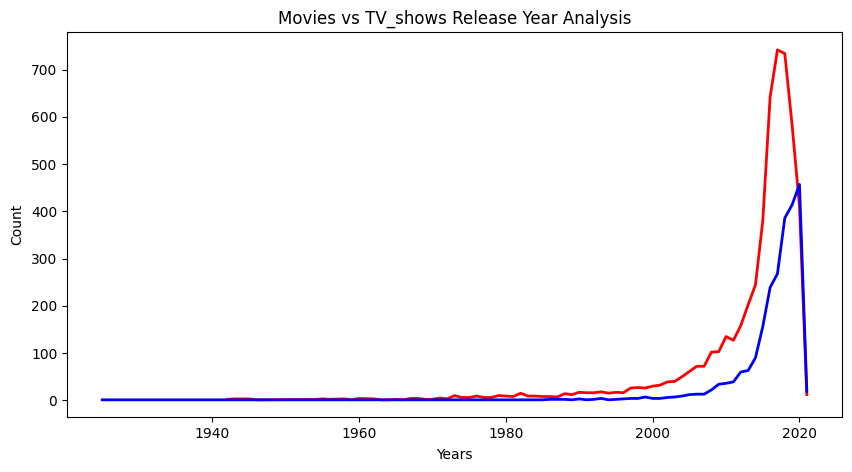

In [75]:

tv_shows_yr = tv_shows_data['release_year'].value_counts().sort_index(ascending=False)
movie_shows_yr = movie_shows_data['release_year'].value_counts().sort_index(ascending=False)

movie_shows_yr.plot(figsize=(10, 5), linewidth=2, color='red')
tv_shows_yr.plot(figsize=(10, 5), linewidth=2, color='blue')
plt.xlabel("Years", labelpad=5)
plt.ylabel("Count", labelpad=5)
plt.title("Movies vs TV_shows Release Year Analysis")


##### 1. Why did you pick the specific chart?

- The line chart shows time trend analysis of movies vs TV shows release year.

##### 2. What is/are the insight(s) found from the chart?

- It is clear from above graph that:
1. Both TV shows and movie release year has seen an incremental growth over years.
2. 2020-2021 has seen maximum releases for both type of shows.





.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Definitely the above states delivers a positive buiness impact by providing a clear picture of shows release year.
- Release year for both type of TV shows has seen an incremental groth over years so no negative growth can be stated.

#### Chart - 8

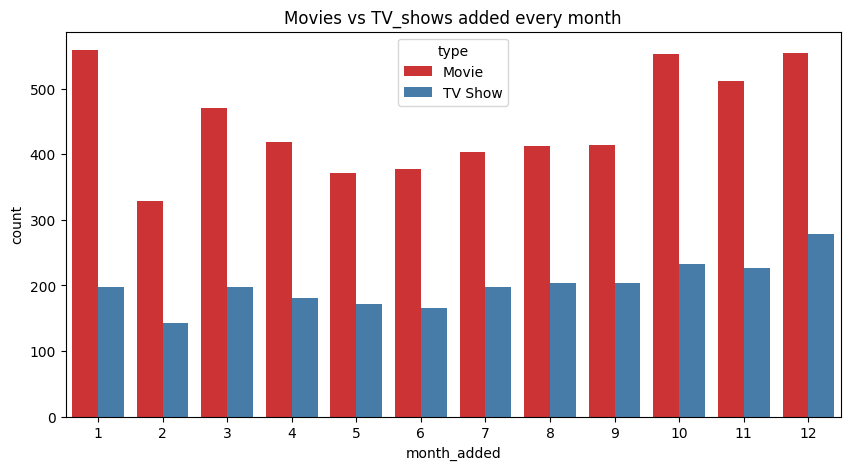

In [35]:

fig, ax = plt.subplots(figsize=(10, 5))


palette = sns.color_palette("Set1")
sns.countplot(x="month_added", hue="type", lw=2, data=df, palette=palette)

plt.title("Movies vs TV_shows added every month")
plt.show()


##### 1. Why did you pick the specific chart?

- The bar chart above give a pictorial representation of how shows are added month on month.

##### 2. What is/are the insight(s) found from the chart?

- We can state from above information that:
1. Movie show type has shown more no.of month on month addition as compared to TV show type.
2. Both show type has seem a fluctuating trend in addition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can signify from above stats that though for both the show types month on month addition is not stable, it shows fluctuating result but movie show type has seen more additions.
- The only near to negative fact about the stats is that TV show type has seen lesser growth as compared to movie show type.


#### Chart - 9

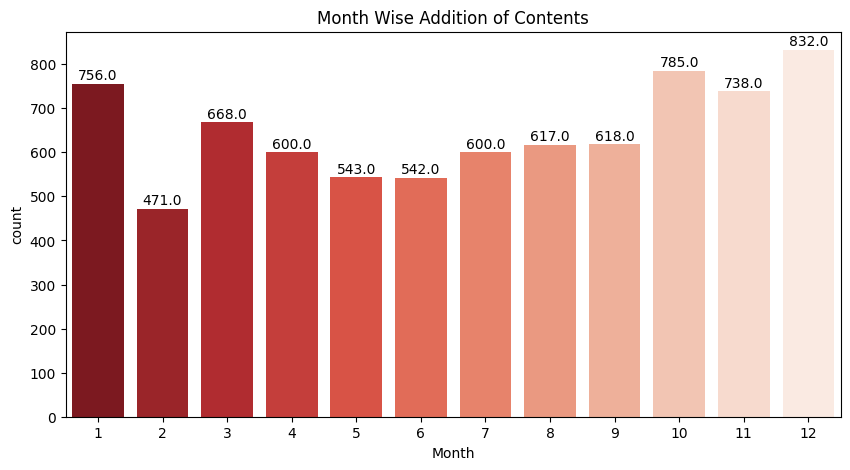

In [80]:
#  Create DataFrame To Store Month Values and Counts
months_df = df['month_added'].value_counts().reset_index()
months_df.columns = ['month', 'count']


# Chart - 5 Count Plot Visualization Code for Month Wise Addition of Contents on Netflix
plt.figure(figsize=(10, 5))
ax=sns.barplot(data=months_df, x='month', y='count', palette='Reds_r')

# Set Labels
plt.title('Month Wise Addition of Contents')
plt.xlabel('Month')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.



##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the shows are uploaded either by year ending or beginning.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

October, November, December, and January are months in which many tv shows and movies get uploaded to the platform.
It might be due to the winter, as in these months people may stay at home and watch tv shows and movies in their free time.

#### Chart - 10 - Correlation Heatmap

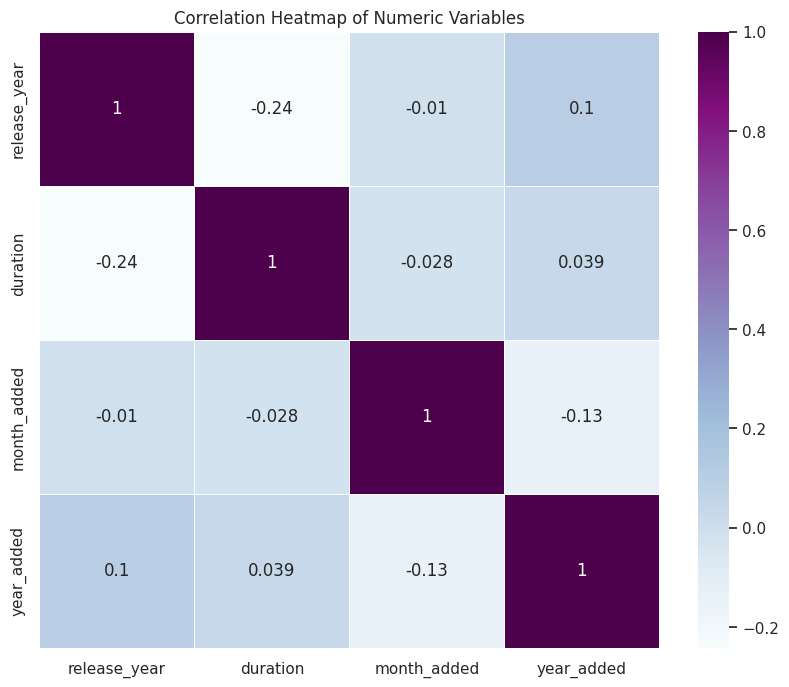

In [93]:
# Identify and exclude non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Compute correlation matrix for numeric columns only
corr_matrix = df[numeric_columns].corr()

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', linewidths=0.5, ax=ax)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

##### 1. Why did you pick the specific chart?

- The selection of heatmap chart is to give a clear insight of how each and every series in the data set are linked to each other, how collaborative the bonds are and how loose are they.

##### 2. What is/are the insight(s) found from the chart?

We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other.


#### Chart - 11 - Pair Plot

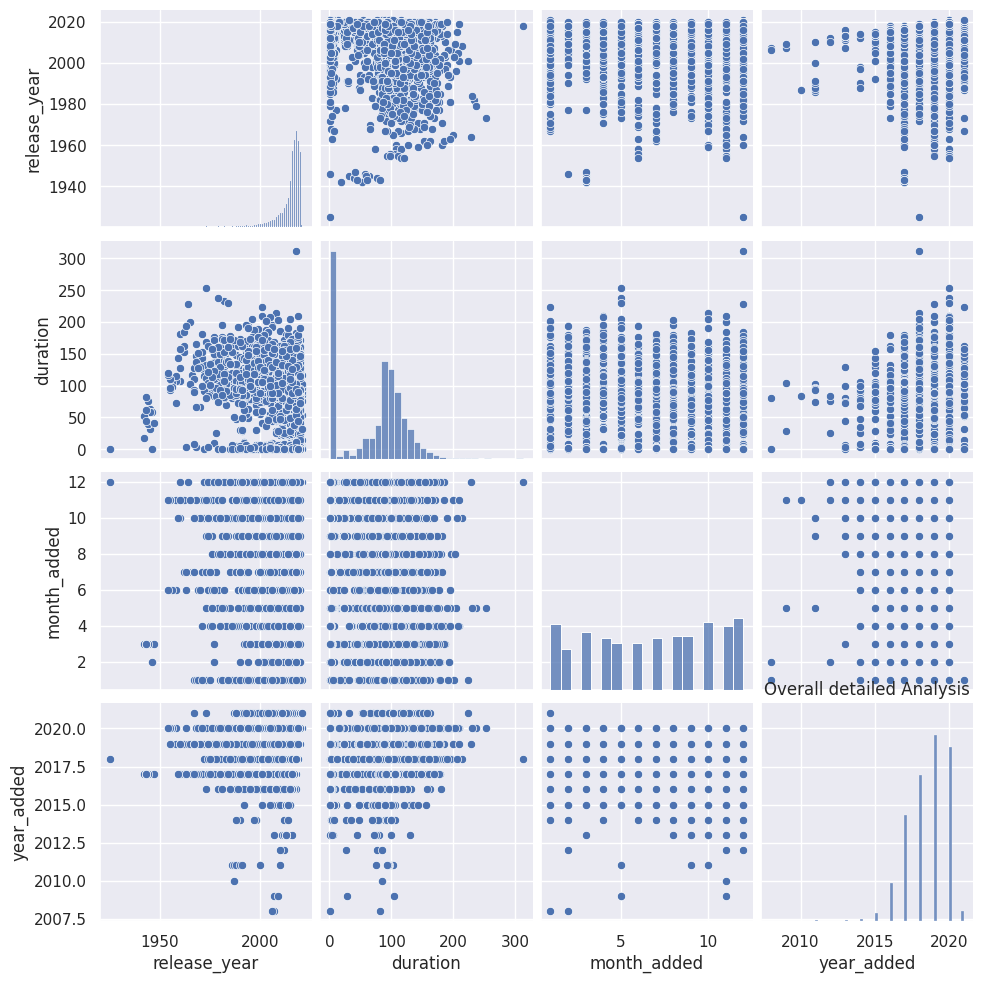

In [ ]:
# Pair Plot visualization code

sns.pairplot(df)

plt.title("Overall detailed Analysis")

plt.show()

##### 1. Why did you pick the specific chart?

- The motive of selecting pair plot is to get a summarized insight of relationship shared between different type of columns in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- Following analysis can be drawn from the above data:
1. Out of all the columns we have extracted out the ones which are are numeric in nature and add some meaningful data to the analysis.
2. The relationship charts give clear highlights of how each column in the dataset shares a relation with another.
3. The peaks in the chart signifies a strong relation when a specified column intersects with itself.

##### 2. What is/are the insight(s) found from the chart?

A collection of significant keywords commonly found in Netflix show descriptions, ideal for generating a word cloud, includes: life, family, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, and secret.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*Hypothetical Statement 1:*
* **Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

* **Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

*Hypothetical Statement 2:*
* **Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

* **Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

*Hypothetical Statement 3:*
* **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

* **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [95]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.

# Subset the data to only include drama and comedy movies
subset = df[df['listed_in'].str.contains('Dramas') | df['listed_in'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['listed_in'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['listed_in'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  7.227758093794016
p-value:  4.910323615750308e-13
Reject the null hypothesis.


We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.


 Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.


##### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [96]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



t-value:  -0.5122738560776298
p-value:  0.6141075339119706
Failed to reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.


##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

**Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.           

#### 2. Perform an appropriate statistical test.

In [99]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest  #------> This function is used to perform z test of proportion.


# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(tv_shows_data['country'].str.contains('United States')) / len(tv_shows_data)
movie_proportion = np.sum(movie_shows_data['country'].str.contains('United States')) / len(movie_shows_data)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(tv_shows_data)), int(movie_proportion * len(movie_shows_data))]
nobs = [len(tv_shows_data), len(movie_shows_data)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  -5.59496544450635
p-value:  2.2066571530490257e-08
Reject the null hypothesis.


We conclude that the proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.



##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.





## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [100]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

Let's move ahead, as we have already dealed with null/missing values from our dataset.

### 2. Handling Outliers

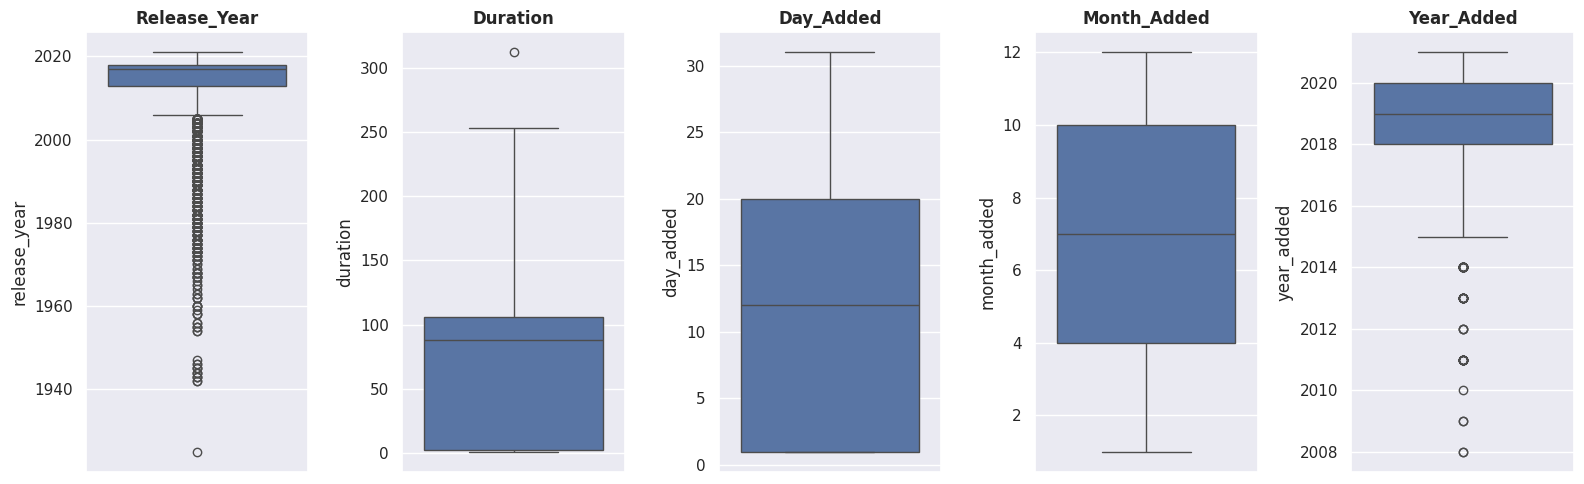

In [111]:
# Storing the continous value feature in a separate list
continous_value_feature= ["release_year","duration","day_added","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Although we have some of the anomalies in continous feature but we will not treat by considering outliers as some of the Movies/TV Shows has released or added early on Netflix.

### 3. Textual Data Preprocessing

In [114]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [115]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
df.shape, df_new.shape

((7770, 14), (7770, 14))

In [116]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_new.sample(2)

NameError: name 'rating_map' is not defined

#### 1. Textual Columns

In [117]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,content_detail
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,14,8,2020,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,23,12,2016,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",20,12,2018,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",16,11,2017,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,1,2020,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


#### 2. Lower Casing

In [118]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hema a. l. vijay comedies movie tv-14 india due to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona.'

#### 3. Removing Punctuations

In [119]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [120]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies movie tv14 india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 4. Removing URLs & Removing words and digits contain digits.

In [121]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [122]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies movie tv   india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 5. Removing Stopwords & Removing White spaces

In [124]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'set' object has no attribute 'words'

In [125]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [126]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

AttributeError: 'set' object has no attribute 'words'

In [127]:
df_new['content_detail'][0]

'jo o miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez  motta celso frateschi unknown international tv shows tv show tvma brazil in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the   saved from squalor'

#### 6. Tokenization

In [128]:
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df_new['content_detail']= df_new['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'a',
 'l',
 'vijay',
 'comedies',
 'movie',
 'tv',
 'india',
 'due',
 'to',
 'family',
 'pressure',
 'a',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'a',
 'woman',
 'from',
 'the',
 'village',
 'but',
 'in',
 'their',
 'new',
 'home',
 'she',
 'abruptly',
 'assumes',
 'a',
 'different',
 'persona']

#### 7. Text Normalization

In [130]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [131]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [132]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedy movie tv india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

##### Which text normalization technique have you used and why?

We have used Lemmatization instead of Stemming for our project because:

* **Lemmatization produces a more accurate base word**: Unlike Stemming, which simply removes the suffix from a word, Lemmatization looks at the meaning of the word and its context to produce a more accurate base form.

* **Lemmatization can handle different inflections**: Lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing.

* **Lemmatization produces real words**: Lemmatization always produces a real word that can be found in a dictionary, making it easier to interpret the results of text analysis.

* **Lemmatization improves text understanding**: By reducing words to their base form, Lemmatization makes it easier to understand the context and meaning of a sentence.

* **Lemmatization supports multiple languages**: While Stemming may only work well for English, Lemmatization is effective for many different languages, making it a more versatile text processing technique.

#### 8. Part of speech tagging

In [133]:
# tokenize the text into words before POS Taging
df_new['pos_tags'] = df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_new.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,content_detail,pos_tags
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,14,8,2020,jo o miguel bianca comparato michel gomes rodo...,"[(jo, NN), (o, MD), (miguel, VB), (bianca, NN)..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,23,12,2016,demi n bichir h ctor bonilla oscar serrano aza...,"[(demi, NN), (n, CC), (bichir, NN), (h, NN), (..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",20,12,2018,tedd chan stella chung henley hii lawrence koh...,"[(tedd, NN), (chan, NN), (stella, NN), (chung,..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",16,11,2017,elijah wood john c reilly jennifer connelly ch...,"[(elijah, RB), (wood, NN), (john, NN), (c, VBP..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,1,2020,jim sturgess kevin spacey kate bosworth aaron ...,"[(jim, NN), (sturgess, NN), (kevin, NN), (spac..."


#### 9. Text Vectorization

In [134]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

In [135]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df_new['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 30000)


##### Which text vectorization technique have you used and why?

We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 30,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [ ]:
# Dimensionality Reduction
# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

In [ ]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

It is clear from the above plot that 7770 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

##### Which dimensionality reduction technique have you used and why?

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***